# Online shoppers Intention

The following notebook demonstrates how data of potential customers related to their online session information of potentially buying a product or not can be used to calculate probabilities as to whether a buyer is interested in buying a product and if he/she is what actions can we take in order to generate revenue through that buyer.

If you didn't understand what I wrote and are like me, an example is always highly helpful :

1. So imagine you have a customer scrolling through your site looking at a web page that details a product offered by you to him.
2. Now how do you increase the chances that he buys this product ?

Now there are multiple ways to do this. You can either show a high discount for limited time to lure him into buying it

Or you can offer him chat based service about the product for helping him with the purchase

Or you can even provide him recommendations of products he has already seen but the ones in which he was highly interested in which you have found through a propensity score which I'll show you how in this notebook.

Knowing how much a customer is interested in a product is highly advantageous to the business. If he is highly interested you can give him chat based services to lure him. If not, you can maybe figure out why that is so or give him higher discounts to make him a loyal customer to your business.

Dataset about customer intention can be downloaded from kaggle : https://www.kaggle.com/roshansharma/online-shoppers-intention/downloads/online-shoppers-intention.zip/1

#### Note : You can read about the details of each column on kaggle itself, I won't be doing it in this notebook

In [1]:
import pandas as pd

In [2]:
buy = pd.read_csv('online_shoppers_intention.csv')

In [3]:
buy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Now there are a lot of columns we are dealing with at the moment and instead of just understanding what each column means, let's just calculate the correlation of each column with the final target column : revenue.

In [16]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

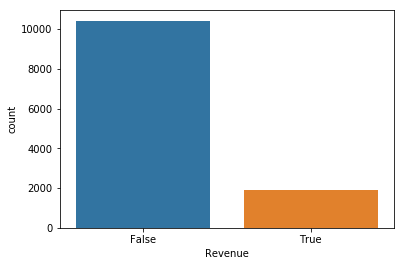

In [7]:
sns.countplot('Revenue',data=buy)

As can be seen and it might intuitive be as well that there are a lot of customers who buy less and hence generate revenue compared to the ones who just surf sites and buy nothing. I won't be resampling in this case since the ratio of true and false in revenue generation is not very low

In [12]:
(buy['Revenue'].value_counts()[1]/buy.shape[0])*100

15.474452554744525

So the above cell is displaying the percentage of customers who bought something and generated revenue as shown in the true column. As can be seen it's 15%

Let's now plot the heatmap that shows correlation between all the features and revenue

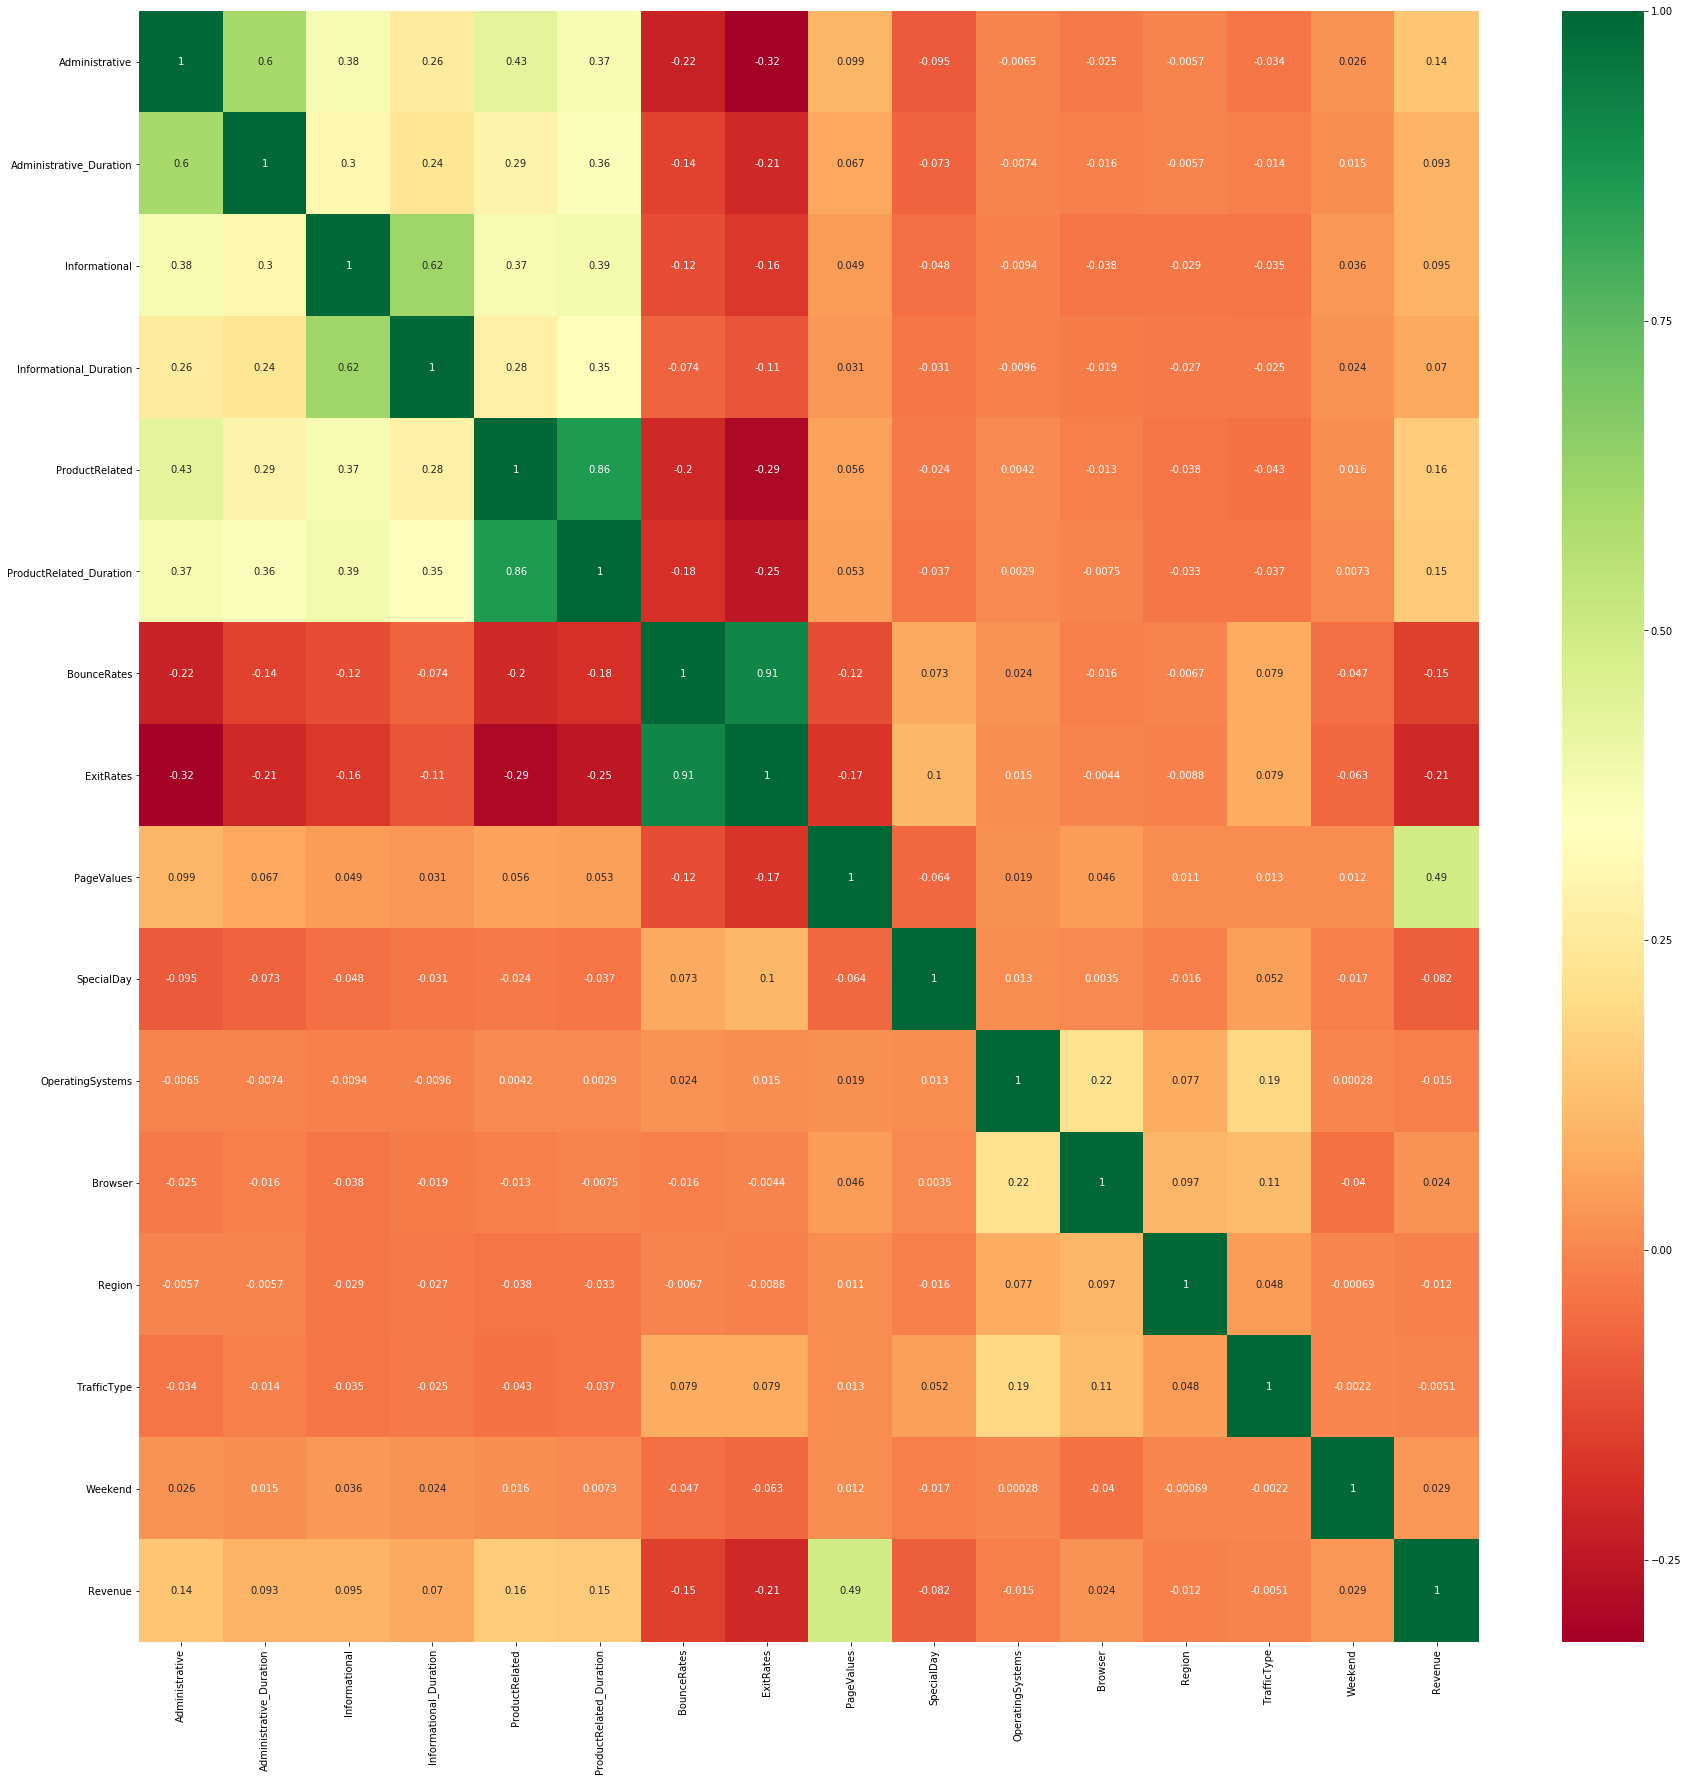

In [20]:
sns.heatmap(buy.corr(),annot=True,cmap='RdYlGn')
f = plt.gcf()
f.set_size_inches(30,30)

Now I am going to use only the features which are highly correlated to revenue variable for making my predictive model. Obviously it's worth experimenting if choosing intuitive columns such as weekend which has a low correlation but intuitively should be used for predictive modeling are worth using or not. But in my case, I won't be using it.

In [24]:
buy2 = buy[['Administrative','Administrative_Duration','Informational','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','Revenue']]


In [25]:
buy2.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,False
1,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,False
2,0.0,-1.0,0.0,1.0,-1.000000,0.20,0.20,0.0,False
3,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,False
4,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,False


In [29]:
buy2['Revenue'] = buy2['Revenue'].apply(lambda x:int(x==True))

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
buy2.head()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0
1,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0
2,0.0,-1.0,0.0,1.0,-1.000000,0.20,0.20,0.0,0
3,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0
4,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0


In [35]:
buy2.isnull().sum().sum()

98

In [40]:
buy2.isnull().any()

Administrative              True
Administrative_Duration     True
Informational               True
ProductRelated              True
ProductRelated_Duration     True
BounceRates                 True
ExitRates                   True
PageValues                 False
Revenue                    False
dtype: bool

So we do have some null values but not a lot so we can just remove the columns with the null values

In [41]:
buy2.shape

(12330, 9)

In [43]:
buy2 = buy2.dropna() 
buy2.shape

(12316, 9)

In [47]:
buy2.isnull().sum().sum()

0

So no nulls !

Now performing predictive modelling

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(buy2.iloc[:,:-1],buy2.iloc[:,-1:])

I am going to use Naive bayes classifier since I will need the predicted probability later on rather than just generated revenue or not

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
model = GaussianNB()

In [52]:
model.fit(x_train,y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
model.score(x_test,y_test)

0.8483273790191621

That's a decent score which can be improved by tuning the model further or maybe going all the way back to data cleaning and preprocessing. But I want to find out the probability and not the final prediction to choose what I want to do with a potential customer.

In [55]:
import numpy as np

In [60]:
data = np.array([0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0]).reshape(1,-1)
data

array([[0. , 0. , 0. , 1. , 0. , 0.2, 0.2, 0. ]])

In [68]:
float(model.predict_proba(data)[:,1])*100

0.004897975332372747

So what the above two cells do is, they take browsing data of user as input and compute the probability of revenue being generated as ouput (0.004% in above case). Now you can do this in real time. For exaple if a potential buyer visits a page, calculate the probability, which will be low since there is not much data to do so, but when he clicks something or maybe increases his product related duration, the product prospensity to be biught by him should increase. Let's see :

In [86]:
data = np.array([0.0,0.0,0.0,1.0,11000.000000,0.20,0.20,0.0]).reshape(1,-1)
float(model.predict_proba(data)[:,1])*100

35.12150760194111

As you can see, the probability has increased by quite a lot by increasing time spent on product related detail. Obviously such a case is imaginary which if you find the meaning of each column will be able to understand better why the data I have provided above is not possible, I am just showing it for demonstrative purposes. But this can be used to determine what actions to perform when the probability that a customer buys a product increases.

For example, if the probability increases beyond 50% we can lure the customer by saying 20% off only 2 hours left. 

Or maybe if the probability is lower let's say at 20% or above (below 50), we can offer him chat based service to sell the product at a more personal level